In [10]:
import os
import keras
import cv2
import h5py
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
from glob import glob
from keras.models import Model
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
from keras.models import Sequential
from tensorflow import keras
from keras.models import load_model
import pickle
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [11]:
train_dir = r'E:\cnn\train'
test_dir = r'E:\cnn\test'
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(96, 96),
        batch_size=32,
        classes = ['Valid','InValid'])
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(96, 96),
        batch_size=12,
        classes = ['Valid','InValid'])

Found 1378 images belonging to 2 classes.
Found 711 images belonging to 2 classes.


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(96,96,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 92, 92, 16)        1216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 46, 46, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 42, 42, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 64)       

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(test_generator.samples/test_generator.batch_size)
hist = model.fit(train_generator,
                    epochs = 3,
                    verbose = 1,
                  steps_per_epoch=steps_per_epoch,
                   validation_data = test_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/3
44/44 [==============================] - 31s 706ms/step - loss: 0.3683 - accuracy: 0.7627 - val_loss: 0.2169 - val_accuracy: 0.9873
Epoch 2/3
44/44 [==============================] - 31s 707ms/step - loss: 0.2065 - accuracy: 0.9753 - val_loss: 0.0869 - val_accuracy: 0.9662
Epoch 3/3
44/44 [==============================] - 31s 700ms/step - loss: 0.0750 - accuracy: 0.9826 - val_loss: 0.0562 - val_accuracy: 0.9747


In [16]:
final_loss, final_accuracy = model.evaluate(test_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

60/60 [==============================] - 7s 123ms/step - loss: 0.0562 - accuracy: 0.9747
Final loss: 0.06
Final accuracy: 97.47%


In [17]:
val_image_batch, val_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (12, 96, 96, 3)


In [18]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Valid' 'Invalid']


In [20]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (12, 2)


In [21]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Invalid' 'Valid' 'Invalid' 'Valid' 'Valid' 'Valid' 'Valid' 'Valid'
 'Invalid' 'Valid' 'Invalid' 'Valid']


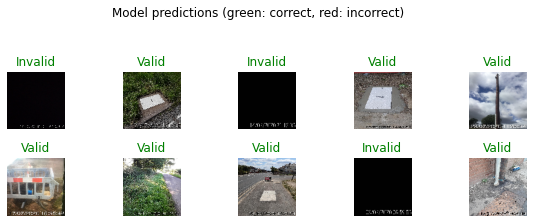

In [22]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [23]:
mlb = pickle.loads(open(r"E:\sample\mlb.pickle", "rb").read())
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

1. InValid
2. Valid


In [24]:
model.save(r'E:\sample\cnn_model.h5')